In [1]:
# !pip install arviz -q #==0.6.1
# !pip install Theano==1.0.5 -q
# !pip install pymc3==3.9.3 -q
!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

In [2]:
import numpy as np
import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
import arviz as az

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


In [3]:
lambdaALCK_array0 = -1*np.array([[-0.014657,-0.014447,-0.014664,-0.015526,-0.01714,-0.022992,-0.034524,-0.070557,-0.11387,-0.20832,-0.01],
[-0.012456,-0.012384,-0.013487,-0.013015,-0.01379,-0.018903,-0.03389,-0.052318,-0.093198,-0.15276,-0.01],
[-0.0098342,-0.0096907,-0.0098001,-0.010041,-0.011918,-0.017406,-0.026369,-0.039222,-0.057673,-0.11743,-0.01],
[-0.0080017,-0.0077559,-0.0076087,-0.0082535,-0.0099144,-0.012286,-0.01889,-0.03604,-0.054248,-0.095491,-0.01],
[-0.0058524,-0.0056572,-0.0072154,-0.0066482,-0.0078467,-0.010037,-0.014898,-0.028174,-0.04584,-0.071974,-0.01],
[-0.0046865,-0.0047947,-0.0044626,-0.0045893,-0.0049986,-0.0081368,-0.014763,-0.019339,-0.035599,-0.060622,-0.01],
[-0.0036558,-0.0031606,-0.0036487,-0.0046674,-0.0031157,-0.0048789,-0.011206,-0.019952,-0.028773,-0.07807,-0.01],
[-0.0024369,-0.0024442,-0.0025014,-0.0024395,-0.0035739,-0.0049891,-0.0062023,-0.010665,-0.018304,-0.029732,-0.01],
[-0.0016189,-0.0017432,-0.0013415,-0.0026006,-0.0021152,-0.0028547,-0.0089079,-0.0074472,-0.017615,-0.024174,-0.01],
[-0.0013258,-0.00074239,-0.00067486,-0.0013035,-0.0019591,-0.0021911,-0.0065414,-0.0074576,-0.016519,-0.65039,-0.01],
[-0.00060974,-0.00027457,-0.00018559,-0.00016811,-0.00085357,-0.0020511,-0.0026312,-0.0053513,-0.038536,-0.014071,-0.01],
[-0.00052181,-0.00050238,-0.00016453,-0.00011248,-0.00068145,-0.00015995,-0.0014959,-0.0041252,-0.0048673,-0.0055963,-0.01],
[-7.0125e-05,-0.00049168,-0.00062104,-0.00094581,-6.2083e-05,-0.0002202,-0.00032468,-0.0053617,-0.01093,-0.01741,-0.01]])

lambdaALCK_array = lambdaALCK_array0[:,:-1]
lambdaALCK_array.shape


# np.save("model2_evidence_lambdaALCK", lambdaALCK_array)
# from google.colab import files
# files.download("model2_evidence_lambdaALCK.npy") # Download locally from colab

(13, 10)

In [4]:
decaylengthALCK_array = 1/lambdaALCK_array

In [6]:
N_Diff = lambdaALCK_array.shape[0]
N_Poff = lambdaALCK_array.shape[0]

logDiff = np.arange(-3, 0.25, 0.25); print(['logDiff.shape =',logDiff.shape])
logPoff = np.arange(-5, 0.0, 0.5); print(['logPoff.shape =',logPoff.shape])

logPoff_array, logDiff_array  = np.meshgrid(logPoff, logDiff)


['logDiff.shape =', (13,)]
['logPoff.shape =', (10,)]


Text(0, 0.5, '$log_{10}(D_{LCK*}^{LA}(\\mu m^2/sec)$)')

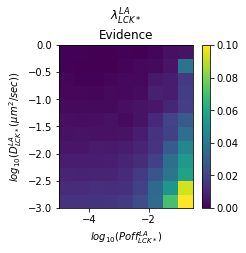

In [7]:
# plot input data


fig, ax0 = plt.subplots(figsize=[3, 3])
vmin0 = 0; vmax0 = 0.1 #150
im0 = ax0.pcolor(logPoff, logDiff, lambdaALCK_array, vmin=vmin0, vmax=vmax0)
# ax0[0].contour(log_Poff_array, log_Diff_array, lambda_aLCK_array, \
#    vmin=vmin0, vmax=vmax0, colors='w')
# im0 = ax0.pcolor(logPoff, logDiff, decaylengthALCK_array)
# ax0.contour(logPoff, logDiff, decaylengthALCK_array, colors='w')
fig.colorbar(im0, ax=ax0)
ax0.set_title('$\lambda_{LCK*}^{LA}$ \nEvidence')
ax0.set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax0.set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)')

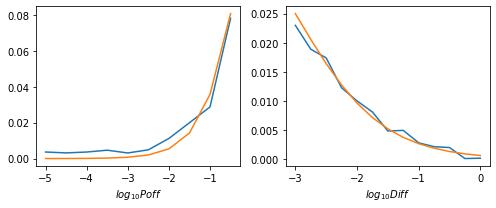

In [8]:
Diff_ind = 6
Poff_ind = 5


min1 = 0
max1 = 0.3
cen1 = -0.0
dev1 = 0.5
sig1 = min1 + (max1 - min1)/(1 + np.exp(-(logPoff - cen1)/dev1))
# sig1 = min1 + (max1 - min1)/(1 + np.exp((-logPoff - cen1)/dev1))

min2 = 0
max2 = 0.05
cen2 = -3
dev2 = -0.7
sig2 = min2 + (max2 - min2)/(1 + np.exp(-(logDiff - cen2)/dev2))

fig, ax1 = plt.subplots(1,2, figsize=[7, 3])
ax1[0].plot(logPoff, lambdaALCK_array[Diff_ind,:])
ax1[0].plot(logPoff, sig1)
ax1[0].set_xlabel('$log_{10}Poff$')

ax1[1].plot(logDiff, lambdaALCK_array[:,Poff_ind])
ax1[1].plot(logDiff, sig2)
ax1[1].set_xlabel('$log_{10}Diff$')

plt.tight_layout()

In [9]:
# xx = np.linspace(-10,10,101)
# sigxx = 0.5 + 3/(1 + np.exp((xx - 2)/0.3))
# plt.plot(xx, sigxx)

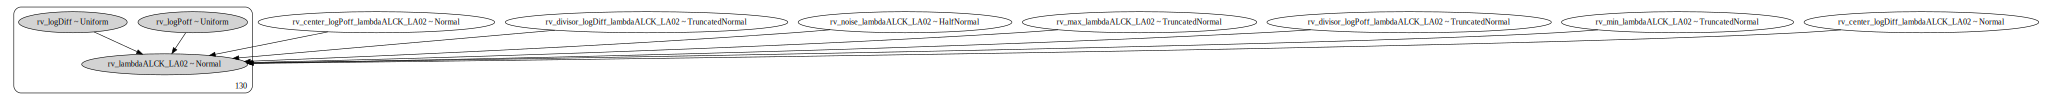

In [9]:
### model2 - LA (LCK activation) ####################################
def get_model2_untrained(logDiff_array, logPoff_array, lambdaALCK_array):
    '''
    TODO: add proper documentation
    '''
    model2 = pm.Model()
    with model2:
        # dw_aLCK_LA ########################################################
        # describing the behaviour of the distribution width (dw) of aLCK
        logDiff_obs = logDiff_array.reshape(-1) 
        logPoff_obs = logPoff_array.reshape(-1)
        lambdaALCK_obs = lambdaALCK_array.reshape(-1)
        
        rv_logDiff = pm.Uniform('rv_logDiff', -3, 0, observed=logDiff_obs)
        rv_logPoff = pm.Uniform('rv_logPoff', -5, 0, observed=logPoff_obs)
        # rv_variableName_parameterName_heatmapName_modelNameModelIndex:
        rv_noise_lambdaALCK_LA02 = pm.HalfNormal('rv_noise_lambdaALCK_LA02',
                                             sd=0.2) # noise 
        
        rv_min_lambdaALCK_LA02 = pm.TruncatedNormal('rv_min_lambdaALCK_LA02',
                                                   mu = 0.0,
                                                   sd = 0.01,
                                                   upper = 0.01)
        
        rv_max_lambdaALCK_LA02 = pm.TruncatedNormal('rv_max_lambdaALCK_LA02',
                                                   mu = 0.3,
                                                   sd = 0.2,
                                                   lower = 0.01)
        
        rv_center_logDiff_lambdaALCK_LA02 = pm.Normal('rv_center_logDiff_lambdaALCK_LA02',
                                                      mu = -3, # 0
                                                      sd = 0.5) # 1

        rv_divisor_logDiff_lambdaALCK_LA02 = pm.TruncatedNormal('rv_divisor_logDiff_lambdaALCK_LA02',
                                                                mu = -0.7, 
                                                                sd = 0.3,
                                                                upper = 0)
        
        rv_center_logPoff_lambdaALCK_LA02 = pm.Normal('rv_center_logPoff_lambdaALCK_LA02',
                                                       mu = 0, # -3
                                                       sd = 1) # 0.5

        rv_divisor_logPoff_lambdaALCK_LA02 = pm.TruncatedNormal('rv_divisor_logPoff_lambdaALCK_LA02',
                                                                mu = 0.5, #
                                                                sd = 0.2,
                                                                lower = 0) # 

        rv_tmp_x1 = (rv_logDiff - rv_center_logDiff_lambdaALCK_LA02)/\
        rv_divisor_logDiff_lambdaALCK_LA02
        rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
        
        rv_tmp_x2 = (rv_logPoff - rv_center_logPoff_lambdaALCK_LA02)/\
        rv_divisor_logPoff_lambdaALCK_LA02
        rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

        rv_lambdaALCK_LA02 = pm.Normal('rv_lambdaALCK_LA02', 
                                       mu=rv_min_lambdaALCK_LA02 +\
                                  (rv_max_lambdaALCK_LA02 - rv_min_lambdaALCK_LA02)*\
                                  rv_tmp_sig1 * rv_tmp_sig2,
                                  sd=rv_noise_lambdaALCK_LA02, 
                                  observed=lambdaALCK_obs)
        
    return model2    

model2 = get_model2_untrained(logDiff_array, logPoff_array, lambdaALCK_array)
gv2 = pm.model_to_graphviz(model2)
gv2

In [ ]:
# from google.colab import files
# gv2.render("model2_graph", format="png")
# files.download("model2_graph.png") # Download locally from colab

In [10]:
with model2:
    trace2 = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_divisor_logPoff_lambdaALCK_LA02, rv_center_logPoff_lambdaALCK_LA02, rv_divisor_logDiff_lambdaALCK_LA02, rv_center_logDiff_lambdaALCK_LA02, rv_max_lambdaALCK_LA02, rv_min_lambdaALCK_LA02, rv_noise_lambdaALCK_LA02]
Sampling chain 3, 0 divergences: 100%|██████████| 2500/2500 [00:12<00:00, 203.93it/s]
The acceptance probability does not match the target. It is 0.8801887432532547, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


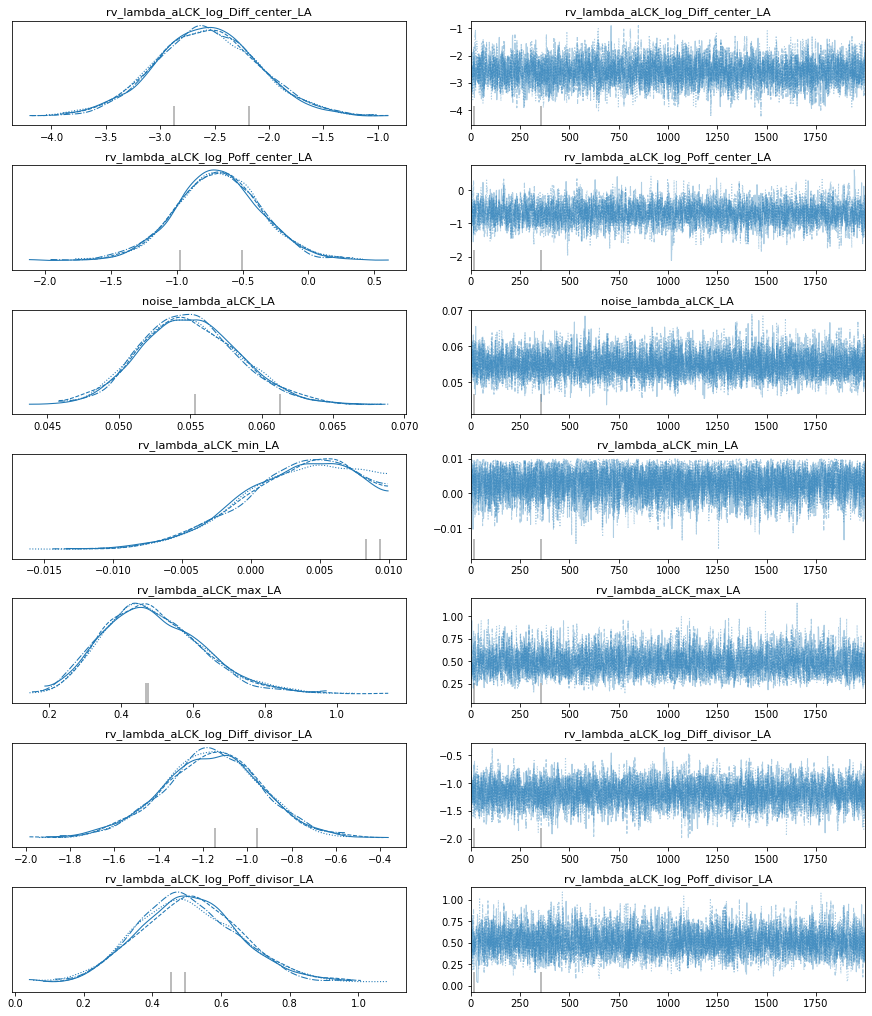

In [ ]:
pm.traceplot(trace2);

In [11]:
pm.summary(trace2).round(3)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
rv_center_logDiff_lambdaALCK_LA02,-2.575,0.472,-3.437,-1.676,0.006,0.005,5420.0,5420.0,5433.0,5451.0,1.0
rv_center_logPoff_lambdaALCK_LA02,-0.676,0.332,-1.309,-0.063,0.005,0.003,4640.0,4640.0,4682.0,4475.0,1.0
rv_noise_lambdaALCK_LA02,0.055,0.004,0.048,0.062,0.000,0.000,7583.0,7527.0,7610.0,4554.0,1.0
rv_min_lambdaALCK_LA02,0.003,0.004,-0.004,0.010,0.000,0.000,5805.0,2921.0,4336.0,2697.0,1.0
rv_max_lambdaALCK_LA02,0.492,0.135,0.247,0.740,0.002,0.001,4928.0,4928.0,4804.0,5027.0,1.0
rv_divisor_logDiff_lambdaALCK_LA02,-1.166,0.222,-1.577,-0.740,0.003,0.002,7376.0,7376.0,7258.0,4942.0,1.0
rv_divisor_logPoff_lambdaALCK_LA02,0.509,0.148,0.237,0.789,0.002,0.001,6524.0,6524.0,6336.0,4043.0,1.0


In [16]:
rv_divisor_logDiff_lambdaALCK_LA02_mean = trace2.rv_divisor_logDiff_lambdaALCK_LA02.mean()
rv_center_logDiff_lambdaALCK_LA02_mean = trace2.rv_center_logDiff_lambdaALCK_LA02.mean()
rv_divisor_logPoff_lambdaALCK_LA02_mean = trace2.rv_divisor_logPoff_lambdaALCK_LA02.mean()
rv_center_logPoff_lambdaALCK_LA02_mean = trace2.rv_center_logPoff_lambdaALCK_LA02.mean()
rv_min_lambdaALCK_LA02_mean = trace2.rv_min_lambdaALCK_LA02.mean()
rv_max_lambdaALCK_LA02_mean = trace2.rv_max_lambdaALCK_LA02.mean()
rv_noise_lambdaALCK_LA02_mean = trace2.rv_noise_lambdaALCK_LA02.mean()


rv_tmp_x1_post = (logDiff_array - rv_center_logDiff_lambdaALCK_LA02_mean) /\
rv_divisor_logDiff_lambdaALCK_LA02_mean
rv_tmp_sig1_post = 1.0 / (1 + np.exp(-rv_tmp_x1_post))

rv_tmp_x2_post = (logPoff_array - rv_center_logPoff_lambdaALCK_LA02_mean) /\
rv_divisor_logPoff_lambdaALCK_LA02_mean
rv_tmp_sig2_post = 1.0 / (1 + np.exp(-rv_tmp_x2_post))

lambdaALCK_validation = rv_min_lambdaALCK_LA02_mean +\
                        (rv_max_lambdaALCK_LA02_mean - rv_min_lambdaALCK_LA02_mean) *\
                         rv_tmp_sig1_post * rv_tmp_sig2_post

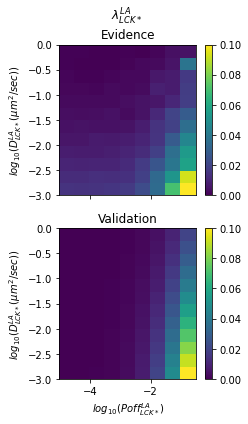

In [17]:
fig, ax0 = plt.subplots(2,1, figsize=[3.5, 6], sharex=True)
vmin0 = 0; vmax0 = 0.1 #150
im0 = ax0[0].pcolor(logPoff, logDiff, lambdaALCK_array, \
   vmin=vmin0, vmax=vmax0)
# ax0[0].contour(logPoff, logDiff, lambdaALCK_array, \
#    vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax0[0])
ax0[0].set_title('$\lambda_{LCK*}^{LA}$ \nEvidence')
# ax0[0].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax0[0].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)')

###
im1 = ax0[1].pcolor(logPoff, logDiff, lambdaALCK_validation) 
# ax0[1].contour(logPoff, logDiff, rv_lambdaALCK_validation, \
#    vmin=vmin0, vmax=vmax0, colors='w') # 
fig.colorbar(im0, ax=ax0[1])
ax0[1].set_title('Validation')
ax0[1].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax0[1].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)')
###

plt.tight_layout();

Build trained model (with updated parameter estimates through their posteriors):

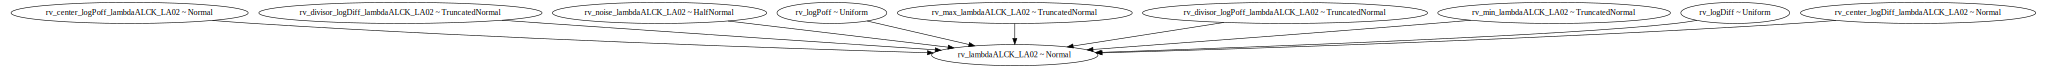

In [18]:
def get_model2_trained(trace2, logDiff_obs=None, logPoff_obs=None):
    ''' return model2 trained based on trace2. 
    If observed_t and/or observed_k are specified, 
    return the model conditioned on those values '''
    model2_trained = pm.Model()
    with model2_trained:
        ### model2 - LA (LCK activation) ###########################    
        # random variables x and y
        rv_logDiff = pm.Uniform('rv_logDiff', -3, 0, observed=logDiff_obs)
        rv_logPoff = pm.Uniform('rv_logPoff', -5, 0, observed=logPoff_obs)

        # random variables
        rv_noise_lambdaALCK_LA02 = pm.HalfNormal('rv_noise_lambdaALCK_LA02',
                                             sd=trace2.rv_noise_lambdaALCK_LA02.mean()) # noise 
        # Sigmoid params
        rv_min_lambdaALCK_LA02 = pm.TruncatedNormal('rv_min_lambdaALCK_LA02', 
                                                   mu = trace2.rv_min_lambdaALCK_LA02.mean(),
                                                   sd = trace2.rv_min_lambdaALCK_LA02.std(),
                                                   upper = 0.01)
        
        rv_max_lambdaALCK_LA02 = pm.TruncatedNormal('rv_max_lambdaALCK_LA02', 
                                                   mu = trace2.rv_max_lambdaALCK_LA02.mean(),
                                                   sd = trace2.rv_max_lambdaALCK_LA02.std(),
                                                   lower = 0.01)
        
        rv_center_logDiff_lambdaALCK_LA02 = pm.Normal('rv_center_logDiff_lambdaALCK_LA02',
                                                  mu = trace2.rv_center_logDiff_lambdaALCK_LA02.mean(),
                                                  sd = trace2.rv_center_logDiff_lambdaALCK_LA02.std())
        
        rv_divisor_logDiff_lambdaALCK_LA02 = pm.TruncatedNormal('rv_divisor_logDiff_lambdaALCK_LA02',
                                                            mu = trace2.rv_divisor_logDiff_lambdaALCK_LA02.mean(),
                                                            sd = trace2.rv_divisor_logDiff_lambdaALCK_LA02.std(),
                                                            upper = 0)
        
        rv_center_logPoff_lambdaALCK_LA02 = pm.Normal('rv_center_logPoff_lambdaALCK_LA02',
                                                      mu=trace2.rv_center_logPoff_lambdaALCK_LA02.mean(),
                                                      sd=trace2.rv_center_logPoff_lambdaALCK_LA02.std())
        
        rv_divisor_logPoff_lambdaALCK_LA02 = pm.TruncatedNormal('rv_divisor_logPoff_lambdaALCK_LA02', 
                                                      mu = trace2.rv_divisor_logPoff_lambdaALCK_LA02.mean(), 
                                                      sd = trace2.rv_divisor_logPoff_lambdaALCK_LA02.std(),
                                                      lower = 0)

        rv_tmp_x1 = (rv_logDiff - rv_center_logDiff_lambdaALCK_LA02)/\
        rv_divisor_logDiff_lambdaALCK_LA02

        rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))

        rv_tmp_x2 = (rv_logPoff - rv_center_logPoff_lambdaALCK_LA02)/\
        rv_divisor_logPoff_lambdaALCK_LA02

        rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

        rv_lambdaALCK_LA02 = pm.Normal('rv_lambdaALCK_LA02', 
                                       mu=rv_min_lambdaALCK_LA02 +\
                                  (rv_max_lambdaALCK_LA02 - rv_min_lambdaALCK_LA02)*\
                                  rv_tmp_sig1 * rv_tmp_sig2,
                                  sd=rv_noise_lambdaALCK_LA02)

    return model2_trained   

model2_trained= get_model2_trained(trace2)
gv2 = pm.model_to_graphviz(model2_trained)
display(gv2)


In [ ]:
logDiffs = np.arange(-3, 0.25, 0.25)
logPoffs = np.arange(-5, 0, 0.5)


In [ ]:
n_logDiff = 13 # 11
n_logPoff = 10 # 11
logDiffs = np.arange(-3, 0.25, 0.25)
logPoffs = np.arange(-5, 0, 0.5)

lambdas_mean = np.zeros((n_logDiff, n_logPoff))
lambdas_std = np.zeros((n_logDiff, n_logPoff))

for i,ld in enumerate(logDiffs):
    for j,lp in enumerate(logPoffs):
        cur_model = get_model2_trained(trace2, logDiff_obs=ld, logPoff_obs=lp)
        with cur_model:
            cur_trace = pm.sample(1000, chains=2, progressbar = False);
        print(f"i,ld={i,ld}, j,lp={j,lp}")
        # display(pm.summary(cur_trace).round(3))
        lambdas_mean[i,j] = cur_trace.rv_lambdaALCK_LA02.mean() 
        lambdas_std[i,j] = cur_trace.rv_lambdaALCK_LA02.std() 

In [ ]:
np.save("model2_trained_lambdaALCK_LA02_mean", lambdas_mean)
np.save("model2_trained_lambdaALCK_LA02_std", lambdas_std)
!ls

model2_trained_lambda_aLCK_LA_mean.npy	sample_data
model2_trained_lambda_aLCK_LA_std.npy


In [ ]:
from google.colab import files
files.download("model2_trained_lambda_aLCK_LA_mean.npy") # Download locally from colab
files.download("model2_trained_lambda_aLCK_LA_std.npy") # Download locally from colab


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

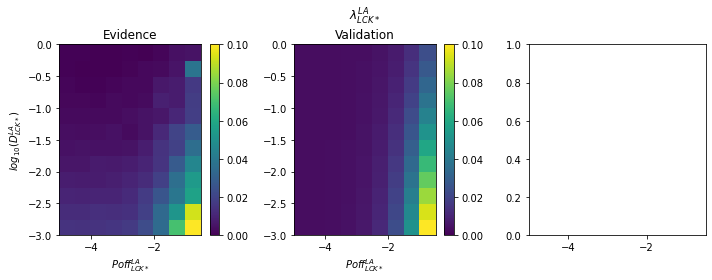

In [21]:
fig, ax0 = plt.subplots(1,3, figsize=[10,4], sharex=True)

vmin0 = 0; vmax0 = 0.1 
im0 = ax0[0].pcolor(logPoff, logDiff, lambdaALCK_array, \
   vmin=vmin0, vmax=vmax0)
# ax0[0].contour(logPoff, logDiff, lambdaALCK_array, \
#    vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax0[0])
ax0[0].set_title(' \nEvidence')
ax0[0].set_xlabel('$Poff_{LCK*}^{LA}$')
ax0[0].set_ylabel('$log_{10}(D_{LCK*}^{LA}$)')

### validation
im1 = ax0[1].pcolor(logPoff, logDiff, lambdaALCK_validation, \
    vmin=vmin0, vmax=vmax0) 
# ax0[1].contour(logPoff, logDiff, lambdaALCK_validation, \
#    vmin=vmin0, vmax=vmax0, colors='w') # vmin=vmin6, vmax=vmax6,
fig.colorbar(im1, ax=ax0[1])
ax0[1].set_title('$\lambda_{LCK*}^{LA}$\nValidation')
ax0[1].set_xlabel('$Poff_{LCK*}^{LA}$')
# ax0[1].set_ylabel('$log_{10}(D_{LCK*}^{LA})$')

"""
### trainded
im2 = ax0[2].pcolor(logPoffs, logDiffs, lambdas_mean, \
    vmin=vmin0, vmax=vmax0) 
# ax0[2].contour(log_Poffs, log_Diffs, Zs_mean, \
#    vmin=vmin0, vmax=vmax0, colors='w') # vmin=vmin6, vmax=vmax6,
fig.colorbar(im1, ax=ax0[2])
ax0[2].set_title('\nTrained)')
ax0[2].set_xlabel('$log_{10}(Poff_{LCK*}^{LA})$')
# ax0[2].set_ylabel('$log_{10}(D_{LCK*}^{LA})$')
###
"""
plt.tight_layout();